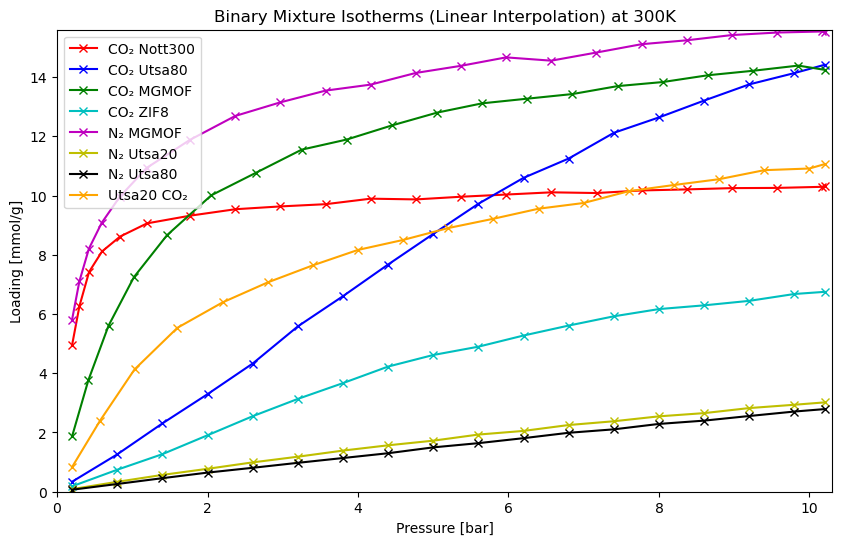

In [4]:
import pandas as pd
import pyiast
import matplotlib.pyplot as plt

# List of CSV filenames and corresponding colors
csv_files = [
    "project - co2 nott300.csv", "project - co2 utsa80.csv", "project - co2-mgmof.csv", 
    "project - co2-zif8.csv", "project - n2 mgmof.csv", "project - n2 utsa20.csv", 
    "project - n2-utsa80.csv", "project - utsa20-co2.csv"
]

# Custom labels for each isotherm
custom_labels = [
    "CO₂ NOTT300", "CO₂ UTSA80", "CO₂ MgMOF", "CO₂ ZIF8", 
    "N₂ MgMOF", "N₂ UTSA20", "N₂ UTSA80", "CO₂ UTSA20 "
]

# Colors for each file's plot
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange']

plt.figure(figsize=(10, 6))

# Iterate over the list of files, colors, and plot each isotherm
for i, (file, label) in enumerate(zip(csv_files, custom_labels)):
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Extract the pressure and loading columns from the file
    pressure = df["pressure(bar)"]
    loading = df["loading_abs_avg(mol/kg)"]
    
    # Create an instance of InterpolatorIsotherm for each file
    isotherm = pyiast.InterpolatorIsotherm(df,
                                           loading_key="loading_abs_avg(mol/kg)",
                                           pressure_key="pressure(bar)")
    
    # Get the interpolated loading values at the actual pressures in the file
    interpolated_loading = [isotherm.loading(p) for p in pressure]
    
    # Plot each isotherm with a unique color and custom label
    plt.plot(pressure, interpolated_loading, label=label, marker='x', color=colors[i])

# Customize plot
plt.title('Binary Mixture Isotherms (Linear Interpolation) at 300K')
plt.xlabel('Pressure [bar]')
plt.ylabel('Loading [mmol/g]')
plt.legend()
plt.grid(False)
plt.xlim(0, 10.3)  # Set x-limit based on the highest pressure in the data
plt.ylim(0, 15.6)  # Adjust y-limit based on your dataset range
plt.show()
